# Real Estate Analysis

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from warnings import filterwarnings
filterwarnings('ignore')

**Loading Dataset**

In [2]:
df = pd.read_excel('Linear Regression.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


We have to predict the Price of the house , how much other factors are affecting Price<br><br>

<li>Target Variable (Price) is Continous</li>

**Checking information of dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


**Checking null values**

In [5]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [6]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


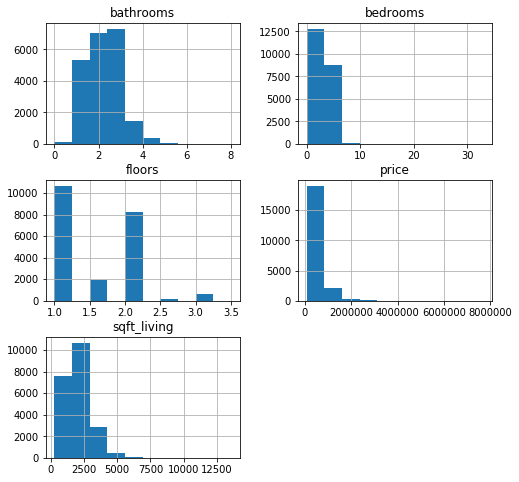

In [7]:
df.hist(figsize=(8,8))
plt.show()

**Inference from Histogram:**<br><br>
<li>Bathrooms is Unimodal and has negative Skewness ie Mean < Median.</li><br>
<li>Bedrooms is Unimodal and has positive Skewness ie Mean > Median</li><br>
<li>Price is Unimodal and has positive Skewness ie Mean > Median</li><br>
<li>Sqft_living is Unimodal and has positive Skewness ie Mean > Median</li><br>
<li>Floors is Multimodal,</li>

# EDA

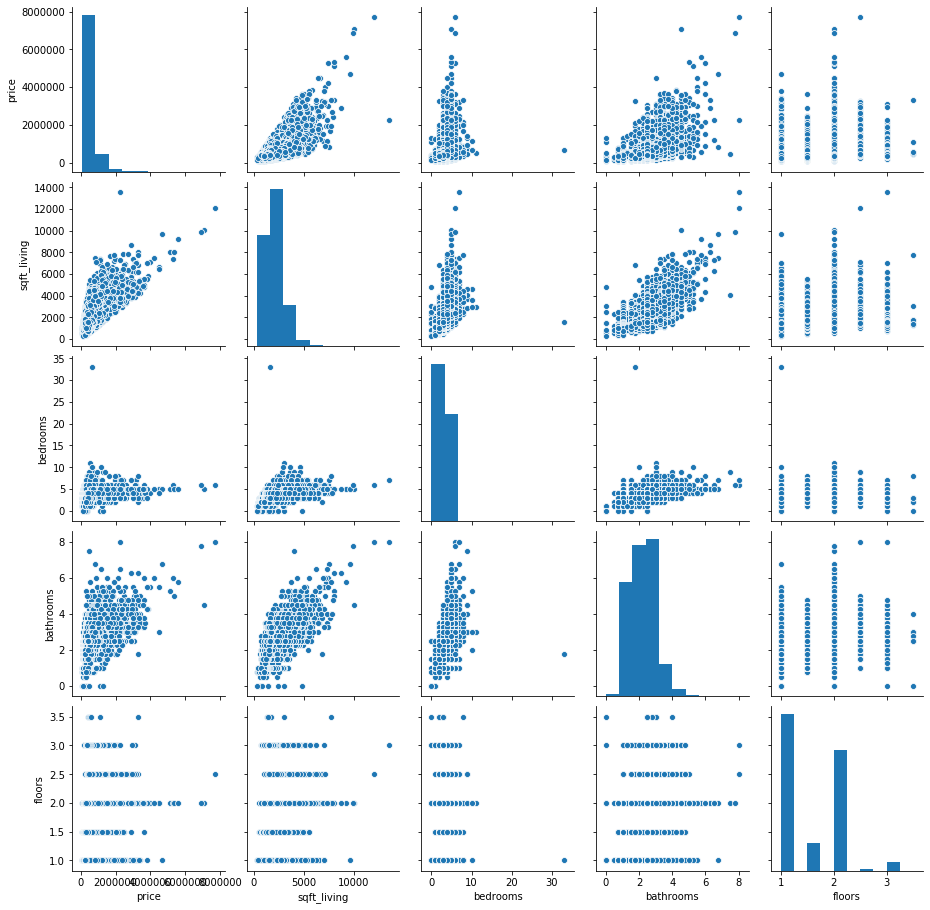

In [9]:
sns.pairplot(df)

**Finding Relationship Between variables**

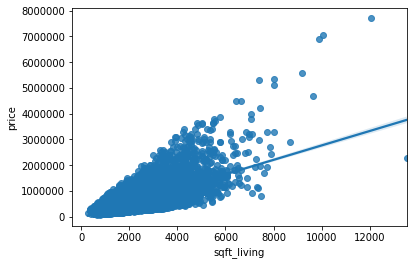

In [10]:
sns.regplot(df.sqft_living, df.price)

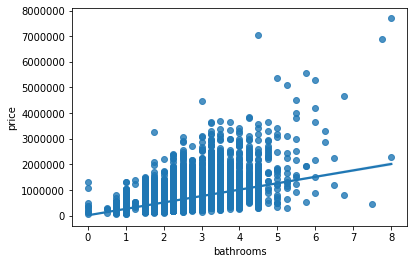

In [11]:
sns.regplot(df.bathrooms, df.price)

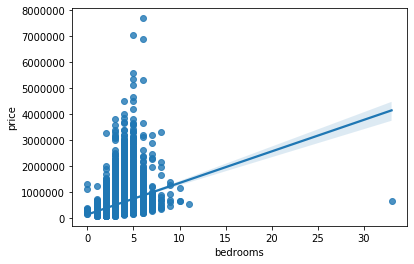

In [12]:
sns.regplot(df.bedrooms, df.price)

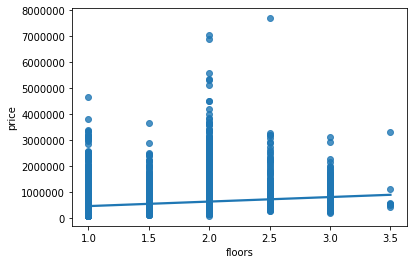

In [13]:
sns.regplot(df.floors, df.price)

**Inference from Regplot and Pairplot**<br>
The Dependent variable "price" :<br><br>

<li>It has Strong Relation with area of living in square feet,</li>
<li>It has moderate Relation with number of bathrooms and bedrooms</li>
<li>It has almost no Relation with number of floors.</li>

**Finding Outliers using Boxplot**

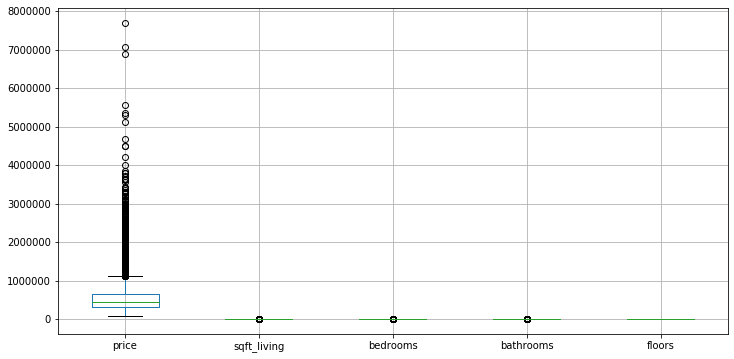

In [14]:
df.boxplot(figsize=(12,6))
plt.show()

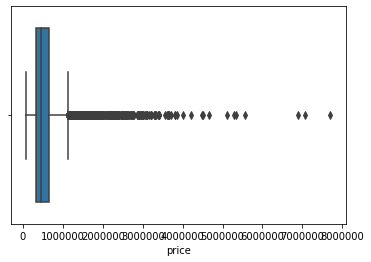

In [15]:
sns.boxplot(df['price'])

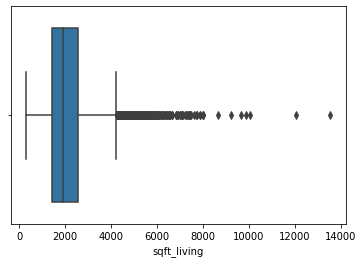

In [16]:
sns.boxplot(df['sqft_living'])

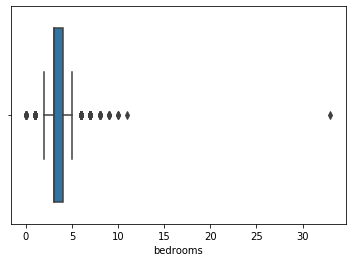

In [17]:
sns.boxplot(df['bedrooms'])

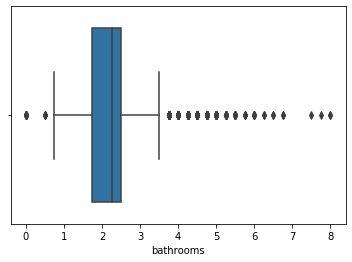

In [18]:
sns.boxplot(df['bathrooms'])

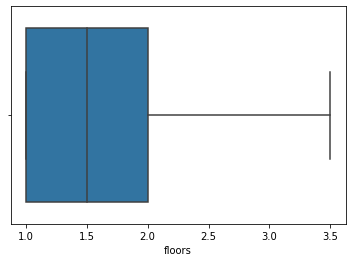

In [19]:
sns.boxplot(df['floors'])

**Inference from Boxplot**<br><br>
<li>The Dependent Variable (Price) has many Outliers</li>
<li>Square feet Living has many Outliers</li>
<li>Bedrooms has Moderate Outliers but It also include an Extreme Outlier(which can be removed from dataset)</li>
<li>Bathroms has Moderate Outliers</li>
<li>Floors has No Outlier</li>

**Correlation Matrix**

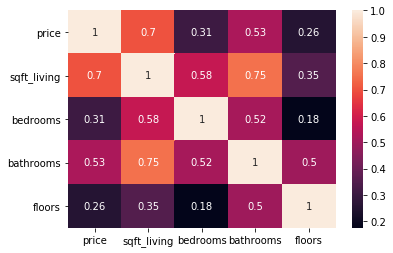

In [21]:
sns.heatmap(df.corr(),annot=True)

**Inference from Correlation Matrix:**<br><hr>
The Target variable 'price' has :<br>

<li>Strong correlation with area of living in square feet</li>
<li>Moderate correlation with number of bathrooms and bedrooms</li>
<li>almost No correlation with number of floors.</li>

# Applying Linear Regression

<li>Target Variable is Price which is a Continous Variable</li>

# <center> Model 1 </center>

**Price V/S area of living in square feet (sqft_living)**<br>

where Price is Dependent Variable and sqft_living is Independent Variable

In [22]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [23]:
x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [24]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


**Spliting Dataset into Training and Test Set**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

**Fitting Linear Model :**

In [27]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Framing Equation**

In [28]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [-41947.45007397]
Coefficient is:  [[279.51011494]]


**Equation is:**<br>

**price = - 41947.45007397 + 279.51011494 (sqft_living)**


# Predicting Values

In [30]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


**Calculating R-square value**

In [31]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.48388318901296545


**Calculating p value**

In [33]:
stats, p = pearsonr(df.price, df.sqft_living)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.7020350524336836 and p value is 0.0


**Inference from Model1:**

<li>R-square value is 0.48 suggesting that only about 48% of the variance in the target variable.</li>
<li>p value is 0.0 which is less than 0.05 ie sqft_living is affecting Price of House</li>

# <center>Model 2<center>

**Price V/S Bedrooms**

where Price is Dependent Variable and Bedrooms is Independent Variable

In [36]:
x1 = df.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [37]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


**Spliting Dataset into Training and Test Set**

In [38]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 2)

**Fitting Linear Model :**

In [39]:
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Framing Equation**

In [40]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [142835.36507295]
Coefficient is:  [[118301.95858814]]


**Equation is:**<br>

**price = 142835.36507296 + 118301.95858814 (bedrooms)**

**Predicting Values**

In [41]:
y_pred1 = lin_reg.predict(x1_test)
print("Predicted values:\n")
print(y_pred1)

Predicted values:

[[616043.19942552]
 [497741.24083738]
 [379439.28224924]
 ...
 [616043.19942552]
 [497741.24083738]
 [616043.19942552]]


**Calculating R-square value**

In [42]:
print("The r square value is: ", r2_score(y1_test, y_pred1))

The r square value is:  0.10373065781231283


**Calculating p value**

In [43]:
stats, p = pearsonr(df.price, df.bedrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.30834959788482247 and p value is 0.0


**Inference from Model2:**<br><br>
<li>R-square value is 0.10 suggesting that only about 10% of the variance in the target variable.</li>
<li>p value is 0.0 which is less than 0.05 ie bedrooms is affecting Price of House</li>